In [78]:
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [2]:
cab = pd.read_csv('Cab_Data.csv')
customer = pd.read_csv('Customer_ID.csv')
transaction = pd.read_csv('Transaction_ID.csv')
city = pd.read_csv('City.csv')

# Cab Data explore 

In [3]:
cab.shape

(359392, 7)

In [4]:
cab.tail()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480
359391,10440107,43102,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192


In [5]:
cab['Date of Travel'].value_counts()

43105    2022
43084    1123
43077    1100
43449    1086
43063    1085
         ... 
42388      88
42381      86
42380      85
42374      47
42373      25
Name: Date of Travel, Length: 1095, dtype: int64

In [6]:
start = cab['Date of Travel'].min()
end = cab['Date of Travel'].max() 
end- start

1094

In [7]:
start

42371

In [8]:
end

43465

# Customer Data explore 

In [9]:
customer.shape

(49171, 4)

In [10]:

customer.tail()

,Customer ID,Gender,Age,Income (USD/Month)
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454
49170,39761,Female,32,10128


# Transaction Data explore 

In [11]:
transaction.shape

(440098, 3)

In [12]:
transaction.tail()

,Transaction ID,Customer ID,Payment_Mode
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card
440097,10440108,51587,Card


# City Data explore + show city data is unique

In [13]:
city.shape

(20, 3)

This shows the cities included are unique

In [14]:
city['City'].value_counts()

NEW YORK NY         1
CHICAGO IL          1
NASHVILLE TN        1
WASHINGTON DC       1
PITTSBURGH PA       1
SACRAMENTO CA       1
SAN FRANCISCO CA    1
TUCSON AZ           1
SEATTLE WA          1
AUSTIN TX           1
DENVER CO           1
ATLANTA GA          1
DALLAS TX           1
PHOENIX AZ          1
SAN DIEGO CA        1
ORANGE COUNTY       1
SILICON VALLEY      1
MIAMI FL            1
LOS ANGELES CA      1
BOSTON MA           1
Name: City, dtype: int64

In [15]:
city.head()
city.tail()

,City,Population,Users
15,SACRAMENTO CA,"545,776","7,044"
16,PITTSBURGH PA,"542,085","3,643"
17,WASHINGTON DC,"418,859","127,001"
18,NASHVILLE TN,"327,225","9,270"
19,BOSTON MA,"248,968","80,021"


# Merge Cab + Transaction

In [16]:
cab_merge = cab.merge(transaction, on=['Transaction ID'])

In [17]:
cab_merge.tail()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card
359391,10440107,43102,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192,52917,Card


In [18]:
cab_merge.shape

(359392, 9)

# Merge Cab+Transaction+Customer , show each transacation is unique 

In [19]:
cab_merge_2 = cab_merge.merge(customer, on=['Customer ID'])

In [20]:
cab_merge_2.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237


In [21]:
cab_merge_2.shape

(359392, 12)

In [22]:
cab_merge_2.tail()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
359387,10439790,43107,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,38520,Card,Female,42,19417
359388,10439799,43103,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,12490,Cash,Male,33,18713
359389,10439838,43104,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,41414,Card,Male,38,3960
359390,10439840,43106,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,41677,Cash,Male,23,19454
359391,10439846,43104,Yellow Cab,TUCSON AZ,13.30,244.65,180.3480,39761,Card,Female,32,10128


In [23]:
cab_merge_2['Transaction ID'].value_counts()

10000011    1
10139863    1
10222149    1
10213707    1
10184183    1
           ..
10021945    1
10021899    1
10010665    1
10436533    1
10439846    1
Name: Transaction ID, Length: 359392, dtype: int64

# Check for NA values, none!

In [24]:
cab_merge_2.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [25]:
city.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

# Change the Excel dates to normal dates

In [26]:
cab_merge_2['Date of Travel'] = pd.to_datetime(cab_merge_2['Date of Travel'], unit='D', origin='1899-12-30')


In [27]:
cab_merge_2['quan'] = 1

In [28]:
cab_merge_2.sort_values('Date of Travel')

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),quan
4144,10000600,2016-01-02,Yellow Cab,CHICAGO IL,23.75,531.25,336.3000,3363,Cash,Male,31,23320,1
2473,10000171,2016-01-02,Pink Cab,SAN DIEGO CA,14.28,269.15,147.0840,20687,Cash,Male,39,8926,1
6913,10000640,2016-01-02,Yellow Cab,CHICAGO IL,15.60,374.66,209.6640,4844,Cash,Male,32,5548,1
15948,10001242,2016-01-02,Yellow Cab,SILICON VALLEY,18.02,658.65,240.0264,14513,Card,Male,62,3892,1
3322,10000434,2016-01-02,Yellow Cab,BOSTON MA,45.24,971.09,564.5952,59961,Card,Male,61,12377,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297544,10434955,2018-12-31,Yellow Cab,LOS ANGELES CA,18.72,353.47,265.0752,7207,Card,Male,26,8194,1
166609,10438162,2018-12-31,Yellow Cab,CHICAGO IL,34.72,472.05,433.3056,4263,Card,Male,36,19488,1
185095,10434149,2018-12-31,Yellow Cab,AUSTIN TX,9.70,156.60,118.7280,35933,Card,Male,49,13189,1
329591,10434649,2018-12-31,Yellow Cab,CHICAGO IL,24.24,344.50,340.3296,4624,Cash,Female,63,5951,1


# Is there seasonality in KM traveled?

In [29]:
cab_season = pd.pivot_table(cab_merge_2, index = 'Date of Travel', columns='Company', values='KM Travelled')

In [30]:
cab_season

Company,Pink Cab,Yellow Cab
Date of Travel,,
2016-01-02,19.865610,23.424786
2016-01-03,25.811731,22.441429
2016-01-04,19.825000,21.389048
2016-01-05,26.363333,26.454878
2016-01-06,22.131304,22.400116
...,...,...
2018-12-27,22.146667,22.366627
2018-12-28,22.285899,21.958387
2018-12-29,22.723897,22.860413


<AxesSubplot:xlabel='Date of Travel'>

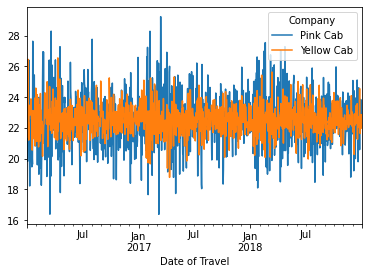

In [76]:
cab_season.plot()

Yes, there is a seasonality in KM traveled by each Cab service. We can see that there are peaks in between Jan and July, around march. The lows of both companies occur around Nov/December. We can also see Pink cab more variation in high and lows of KM traveled while the yellow cab is consistently in the middle. 

# We can calculate this range in both companies by looking at their max/min values

In [32]:
cab_p_max = cab_season['Pink Cab'].max()
cab_p_min = cab_season['Pink Cab'].min()

cab_y_max = cab_season['Yellow Cab'].max()
cab_y_min = cab_season['Yellow Cab'].min()

range_pink = cab_p_max - cab_p_min
range_yellow = cab_y_max - cab_y_min


In [33]:
range_pink

12.840625000000003

In [34]:
range_yellow

7.761797202797201

# Is there any seasonality in numbers of customers using the cab service?

I want to look at monthly time periods, ie 30 days. and plot the sum of customers each company had as lines. 

<AxesSubplot:xlabel='Date of Travel'>

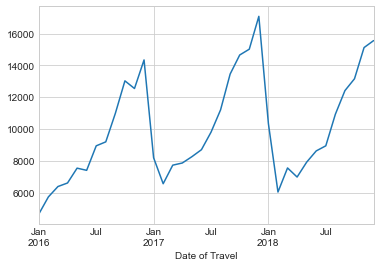

In [82]:
cab_merge_2.resample('M', on='Date of Travel').quan.sum().plot()

We see here clearly the seasonality in numbers of customers using the cab service. 

# With the observed seasonality, how much is with each resepective company?

In [36]:
cab_max_month = pd.pivot_table(cab_merge_2, index = 'Date of Travel', columns='Company', values='quan', aggfunc='sum')

In [57]:
new_cab_max_month =cab_max_month.resample('1M').agg({'Pink Cab':'sum', 'Yellow Cab':'sum'})

<AxesSubplot:xlabel='Date of Travel'>

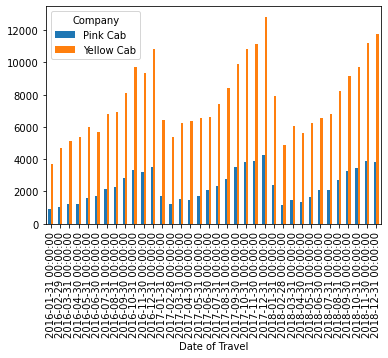

In [61]:
new_cab_max_month.plot.bar()

We can clearly see that there is a seasonaility in the number of customers using the cab service, with the increasing throughout the year until it reached the end of the year. 

# Which company has max cab users at a particular time period?

I think we can see from the last plot that the Yellow Cab, has maximum car users at any month. Let's look at daily. 

In [69]:
cab_max_month['Diff'] = cab_max_month['Yellow Cab'] - cab_max_month['Pink Cab']

In [70]:
cab_max_month

Company,Pink Cab,Yellow Cab,Diff
Date of Travel,,,
2016-01-02,41,140,99
2016-01-03,52,126,74
2016-01-04,4,21,17
2016-01-05,6,41,35
2016-01-06,23,86,63
...,...,...,...
2018-12-27,66,252,186
2018-12-28,217,626,409
2018-12-29,195,630,435


In [71]:
(cab_max_month < 0).any().any()

False

This above shows Diff = [Cab users for Y daily] - [Cab users for P daily] > 0, which means [Cab users for Y daily] >[Cab users for P daily]. Thus, every day we were provided data, The yellow cab always had more users than the pink cab. Let's show this graphically. 

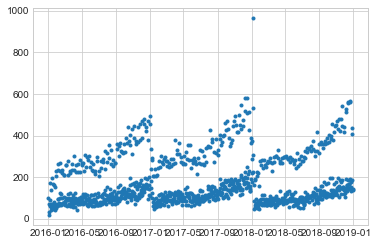

In [79]:
plt.plot(cab_max_month['Diff'],'.')